<a id='top'></a>

# CSCI3022 S21
# Homework 2: Data Wrangling and Visualizations
***

**Name**: Jaryd Meek

***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [2]:
filepath = '../Data/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [3]:
#Your Code here
peopleSurvived = np.sum(df["Survived"]==1)
totalPeople = len(df)
print("Probability of Survival - {0:.2f}%".format(100*(peopleSurvived/totalPeople)))

Probability of Survival - 39.28%


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**SOLUTION**
*Class Warfare -* If this occurred on the titanic I would expect the data to show that the probability of a person with a better class status surviving would be greater than the probability of a person with a lower class status.

*Male Chivalry -* If this occured on the titanic, I would expect teh data to show that the probability of women surviving would be greater than the probability of men surviving.

*Mutually Exclusive -* No. It's possible that both class warfare and male chivalry occured on the Titanic.

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [4]:
#Thinking to find where the data is blank
#print a large number of values and see what happens with blank data
#df.head(20)
#We can see pandas fills empty data with NaN
#A quick google search tells us to use .dropna() to clean out empty rows, we just need to feed it with rows to check for data to clean

#Clean the data and store it as a new array
dfCleaned = df.dropna(subset=["Survived","Pclass","Age","Sex"])


print("Number of rows in the original list - " + str(len(df)))
print("Number of rows in the cleaned list - " + str(len(dfCleaned)))

Number of rows in the original list - 891
Number of rows in the cleaned list - 714


**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [5]:
#Calculate the Probabilities
#Probability of Survival-

#Number of people in class that survived / number of people in class
probClass1 = dfCleaned.loc[dfCleaned["Pclass"]==1, "Survived"].sum()/np.sum(dfCleaned["Pclass"] == 1)
probClass2 = dfCleaned.loc[dfCleaned["Pclass"]==2, "Survived"].sum()/np.sum(dfCleaned["Pclass"] == 2)
probClass3 = dfCleaned.loc[dfCleaned["Pclass"]==3, "Survived"].sum()/np.sum(dfCleaned["Pclass"] == 3)

#Number of people in gender that survived / number of people in gender
probMale = dfCleaned.loc[dfCleaned["Sex"]== "male", "Survived"].sum()/np.sum(dfCleaned["Sex"]== "male")
probFemale = dfCleaned.loc[dfCleaned["Sex"]=="female", "Survived"].sum()/np.sum(dfCleaned["Sex"]== "female")


#number of people in class and gender that survived/number of people in class and gender
probM1 = dfCleaned.loc[(dfCleaned["Sex"] == "male") & (dfCleaned["Pclass"] == 1), "Survived"].sum()/len(dfCleaned.loc[(dfCleaned["Sex"] == "male") & (dfCleaned["Pclass"] == 1)])
probM2 = dfCleaned.loc[(dfCleaned["Sex"] == "male") & (dfCleaned["Pclass"] == 2), "Survived"].sum()/len(dfCleaned.loc[(dfCleaned["Sex"] == "male") & (dfCleaned["Pclass"] == 2)])
probM3 = dfCleaned.loc[(dfCleaned["Sex"] == "male") & (dfCleaned["Pclass"] == 3), "Survived"].sum()/len(dfCleaned.loc[(dfCleaned["Sex"] == "male") & (dfCleaned["Pclass"] == 3)])
probF1 = dfCleaned.loc[(dfCleaned["Sex"] == "female") & (dfCleaned["Pclass"] == 1), "Survived"].sum()/len(dfCleaned.loc[(dfCleaned["Sex"] == "female") & (dfCleaned["Pclass"] == 1)])
probF2 = dfCleaned.loc[(dfCleaned["Sex"] == "female") & (dfCleaned["Pclass"] == 2), "Survived"].sum()/len(dfCleaned.loc[(dfCleaned["Sex"] == "female") & (dfCleaned["Pclass"] == 2)])
probF3 = dfCleaned.loc[(dfCleaned["Sex"] == "female") & (dfCleaned["Pclass"] == 3), "Survived"].sum()/len(dfCleaned.loc[(dfCleaned["Sex"] == "female") & (dfCleaned["Pclass"] == 3)])

print("Probability of Survival of First Class - {0:.2f}%".format(100*probClass1))
print("Probability of Survival of Second Class - {0:.2f}%".format(100*probClass2))
print("Probability of Survival of Third Class - {0:.2f}%".format(100*probClass3))
print("Probability of Survival of Males - {0:.2f}%".format(100*probMale))
print("Probability of Survival of Females - {0:.2f}%".format(100*probFemale))
print("-----------------")
print("Probability of Survival of First Class Males - {0:.2f}%".format(100*probM1))
print("Probability of Survival of Second Class Males - {0:.2f}%".format(100*probM2))
print("Probability of Survival of Third Class Males - {0:.2f}%".format(100*probM3))
print("Probability of Survival of First Class Females - {0:.2f}%".format(100*probF1))
print("Probability of Survival of Second Class Females - {0:.2f}%".format(100*probF2))
print("Probability of Survival of Third Class Females - {0:.2f}%".format(100*probF3))

Probability of Survival of First Class - 64.29%
Probability of Survival of Second Class - 48.28%
Probability of Survival of Third Class - 25.19%
Probability of Survival of Males - 19.65%
Probability of Survival of Females - 74.90%
-----------------
Probability of Survival of First Class Males - 38.71%
Probability of Survival of Second Class Males - 18.39%
Probability of Survival of Third Class Males - 13.78%
Probability of Survival of First Class Females - 96.00%
Probability of Survival of Second Class Females - 93.10%
Probability of Survival of Third Class Females - 52.54%


**SOLUTION**  
*Base Probability of Survival -* 39.28%

   (i) Both first and second class had a higher rate of survival than the base survival probability. Third class, however, did not and had a lower rate of survival than the base rate of survival
    
   (ii) Females had a much greater probability of survival than the base survival probability, while males had a lower probability of survival.
    
   (iii) Within each passenger class, women were *far* more likely to survive compared to men.

   (iv) Women in third class had a higher probability of survival compared with men in first class.

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

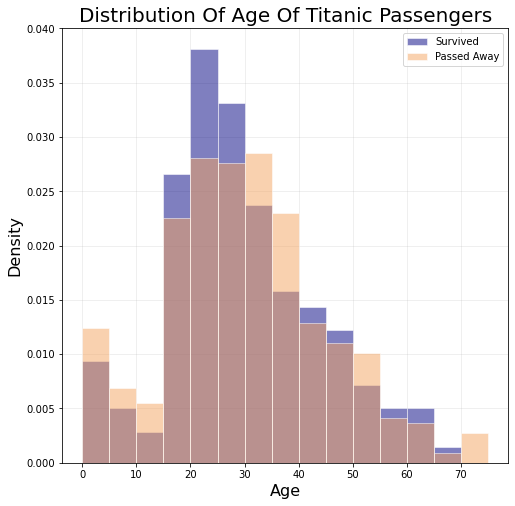

In [6]:
my_bins = range(0,80,5)

fig, ax = plt.subplots(figsize=(8,8))

dfCleaned.loc[dfCleaned["Survived"]== 1].hist(column="Age", density=True, ax=ax, bins=my_bins, facecolor="navy", alpha = 0.5, edgecolor="white")
dfCleaned.loc[dfCleaned["Survived"]== 0].hist(column="Age", density=True, ax=ax, bins=my_bins, facecolor="sandybrown", alpha = 0.5, edgecolor="white")

# Add titles and labels 
ax.set_title("Distribution Of Age Of Titanic Passengers", fontsize=20)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Density", fontsize=16)

# Make grid lighter and set behind data
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend(["Survived", "Passed Away"]);

**SOLUTION**  
The data above suggests that ages 0-15, 30-40, 50-55, and 70-75 were more likely to pass away as compared to the rest of the age groups. This may be because the older passengers were willing to give their spots on the lifeboats to younger people, or perhaps because younger people could survive in the frigid waters longer than the older people since they are younger.

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**SOLUTION**  
It would be misleading to plot these as frequency histograms instead since frequency histograms would show the number of people who died, not the likelyhood to survive as a density histogram will.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**SOLUTION**  
Yes, based on the computations done above, I believe that there was likely class warfare, male chivalry, and age bias going on in the final hours aboard the Titanic. 

If you look at the percentage of women who survived compared to men, you can see that male chivalry definitely occured since men had a 1/4 the probability of survival. 

You can also see that class warfare occured since 2/3 of first class passengers survived, while only 1/4 of the third class passengers survived.

Finally I believe that age bias occured, since if you look at the histograms 15-30 year olds were less likely to have passed away, while more 30-40 year olds were more likely to pass away than survive. This leads to the belief that class warfare definetly occured.

[Back to top](#top)
<a id='p2'></a>

## (20 pts) Problem 2: Data (Box Plots and Outliers)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [7]:
dfPrecip = pd.read_csv('../Data/boulder_precip_12021.csv')
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2021 isn't over yet!  We have one row at the bottom that isn't fully complete and blank values are filling the months that haven't happened yet.  This can wreak havoc on some of our methods!  **Drop** the 2021 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric! (see `df.dtypes`)

In [8]:
#Your code here
# 1 - 
dfPrecip = dfPrecip.replace("Tr", 0)

#2 - 
dfPrecip = dfPrecip.drop(121)

#3 - 
#Remove Asterisks
dfPrecip = dfPrecip.replace("\*","",regex=True)
#Set datatype to floats
dfPrecip = dfPrecip.astype(float)

**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

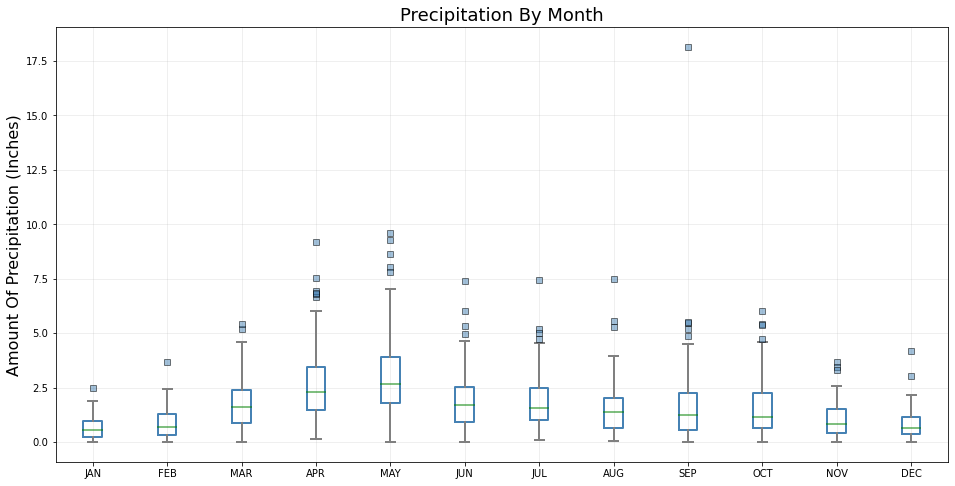

In [9]:
#Your code here
fig, ax = plt.subplots(figsize=(16,8))

bp = dfPrecip.boxplot(column=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"], ax=ax, widths=[.25,.25,.25,.25,.25,.25,.25,.25,.25,.25,.25,.25],  return_type='dict')

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)
    
ax.set_title('Precipitation By Month', fontsize=18)
ax.set_ylabel("Amount Of Precipitation (Inches)", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)


**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

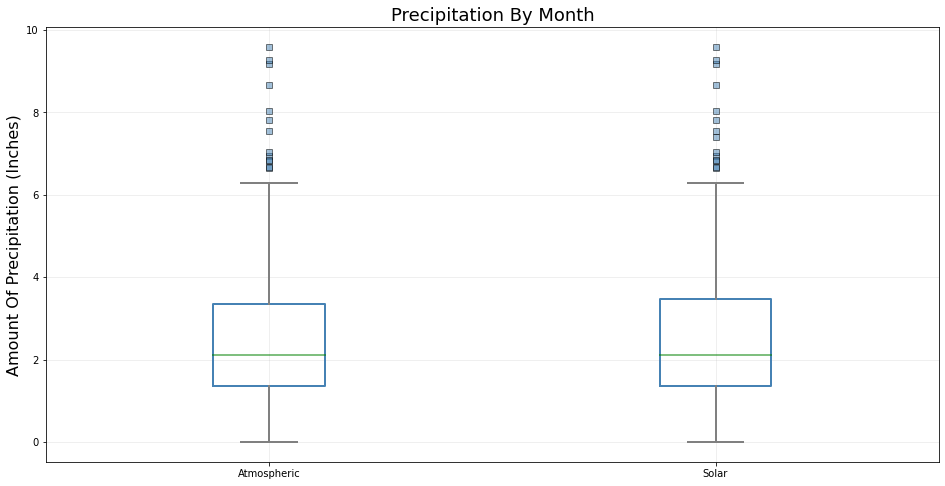

In [10]:
#Your code here

dfAtmospheric = pd.DataFrame()
dfAtmospheric = pd.concat([dfPrecip['MAR'], dfPrecip['APR'], dfPrecip['MAY']])

dfSolar = pd.DataFrame()
dfSolar = pd.concat([dfPrecip['APR'], dfPrecip['MAY'], dfPrecip['JUN']])

dfSpring = pd.concat([dfAtmospheric, dfSolar], axis=1)
dfSpring.columns = ['Atmospheric', 'Solar']


fig, ax = plt.subplots(figsize=(16,8))

bp = dfSpring.boxplot(ax=ax, widths=[.25, .25], return_type='dict');

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)
    
ax.set_title('Precipitation By Month', fontsize=18)
ax.set_ylabel("Amount Of Precipitation (Inches)", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)


**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [11]:
#Code here
print("---Atmospheric---")
print(dfAtmospheric.describe().loc[['mean','std','min','25%','50%','75%','max']].to_string())
print("\n------SOLAR------")
print(dfSolar.describe().loc[['mean','std','min','25%','50%','75%','max']].to_string())

---Atmospheric---
mean    2.508623
std     1.675328
min     0.000000
25%     1.365000
50%     2.110000
75%     3.355000
max     9.590000

------SOLAR------
mean    2.560331
std     1.702381
min     0.000000
25%     1.355000
50%     2.100000
75%     3.465000
max     9.590000


**SOLUTION**

Not really, almost all of the datapoints are within 0.05 inches of each other. This means that either of the "Springs" could be used for analysis.

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

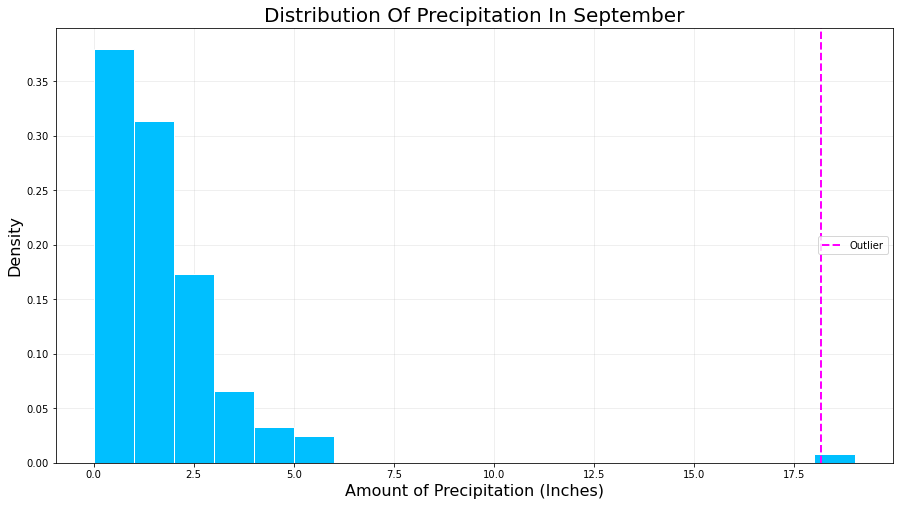

In [12]:
# September box plot code here
my_bins = range(0,20,1)

fig, ax = plt.subplots(figsize=(15,8))

dfPrecip.hist(column="SEP", density=True, ax=ax, bins=my_bins, facecolor="deepskyblue", edgecolor="white")
ax.axvline(x=18.16, color='magenta', linestyle='dashed', linewidth=2,  label='Outlier')

# Add titles and labels 
ax.set_title("Distribution Of Precipitation In September", fontsize=20)
ax.set_xlabel("Amount of Precipitation (Inches)", fontsize=16)
ax.set_ylabel("Density", fontsize=16)

# Make grid lighter and set behind data
ax.legend(loc='center right')
ax.grid(alpha=0.25)
ax.set_axisbelow(True)


**SOLUTION**

This histogram shows the distribution of precipition in September. It is unimodal, right skewed, and contains 1 outlier at x = 18.16.

**Part F:** That one data point in September 2013 is pretty out there!  Compute the mean and standard deviation of the September precipitation values, then compute them again while excluding the 2013 observation.  How much did each change?

If someone were to ask you about the average weather in September, what would you respond?



In [13]:
# September code here
print("-----With Outlier-----")
print("Mean: {:.2f} Standard Deviation: {:.2f}".format(dfPrecip["SEP"].mean(), dfPrecip["SEP"].std()))


print("\n---Without Outlier---")
print("Mean: {:.2f} Standard Deviation: {:.2f}".format(dfPrecip["SEP"].loc[dfPrecip["SEP"]<10].mean(), dfPrecip["SEP"].loc[dfPrecip["SEP"]<10].std()))


-----With Outlier-----
Mean: 1.69 Standard Deviation: 1.98

---Without Outlier---
Mean: 1.55 Standard Deviation: 1.28


**SOLUTION**

The average didn't change much, but the standard deviation changed a fair amount.

If someone asked me what the average weather in September is, I would reply 1.55 inches. In over 100 years, we've never had any amount of precipitation even close to the amount that we got in September 2013. Therefore I'd say that it's VERY much an outlier, and can "ignore" it when reporting statistics.

[Back to top](#top)